# Aggregating & plotting time series in python
http://blog.yhathq.com/posts/aggregating-and-plotting-time-series-in-python.html

## Data set
using meat data set 
it contains metrics on livestock, dairy, and poultry outlook and production.
we using `ggplot` package or `pandasql` package

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *

meat = meat.dropna(thresh=800, axis=1)
ts = meat.set_index(['date'])

In [4]:
ts.head(10)

,beef,veal,pork,lamb_and_mutton
date,,,,
1944-01-01,751,85,1280,89
1944-02-01,713,77,1169,72
1944-03-01,741,90,1128,75
1944-04-01,650,89,978,66
1944-05-01,681,106,1029,78
1944-06-01,658,125,962,79
1944-07-01,662,142,796,82
1944-08-01,787,175,748,87
1944-09-01,774,182,678,91


In [6]:
# aggregating data and time based data by year.
ts.groupby(ts.index.year).sum().head(10)

,beef,veal,pork,lamb_and_mutton
1944,8801,1629,11502,1001
1945,9936,1552,8843,1030
1946,9010,1329,9220,946
1947,10096,1493,8811,779
1948,8766,1323,8486,728
1949,9142,1240,8875,587
1950,9248,1137,9397,581
1951,8549,972,10190,508
1952,9337,1080,10321,635
1953,12055,1451,8971,715


## Grouping by decade

In [35]:
the1940s = ts.groupby(ts.index.year).sum().ix[1940:1949]
the1940s

,beef,veal,pork,lamb_and_mutton
1944,8801,1629,11502,1001
1945,9936,1552,8843,1030
1946,9010,1329,9220,946
1947,10096,1493,8811,779
1948,8766,1323,8486,728
1949,9142,1240,8875,587


In [42]:
def floor_decade(date_value):
    return (date_value.year//10)*10
pd.to_datetime('2013-10-09')


Timestamp('2013-10-09 00:00:00')

In [43]:
floor_decade(_)

2010

In [44]:
ts.groupby(floor_decade).sum()

,beef,veal,pork,lamb_and_mutton
1940,55751.0,8566.0,55737.0,5071.0
1950,119161.0,12693.0,98450.0,6724.0
1960,177754.0,8577.0,116587.0,6873.0
1970,228947.0,5713.0,132539.0,4256.0
1980,230100.0,4278.0,150528.0,3394.0
1990,243579.0,2938.0,173519.0,2986.0
2000,260540.7,1685.3,208211.3,1964.7
2010,76391.5,371.9,66491.2,455.6


In [45]:
the1940s.sum().reset_index(name='meat sum in the 1940s')

,index,meat sum in the 1940s
0,beef,55751
1,veal,8566
2,pork,55737
3,lamb_and_mutton,5071


In [59]:
by_decade = ts.groupby(floor_decade).sum()
by_decade.index.name='year'
by_decade = by_decade.reset_index('year')
by_decade

,year,beef,veal,pork,lamb_and_mutton
0,1940,55751.0,8566.0,55737.0,5071.0
1,1950,119161.0,12693.0,98450.0,6724.0
2,1960,177754.0,8577.0,116587.0,6873.0
3,1970,228947.0,5713.0,132539.0,4256.0
4,1980,230100.0,4278.0,150528.0,3394.0
5,1990,243579.0,2938.0,173519.0,2986.0
6,2000,260540.7,1685.3,208211.3,1964.7
7,2010,76391.5,371.9,66491.2,455.6


In [52]:
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline


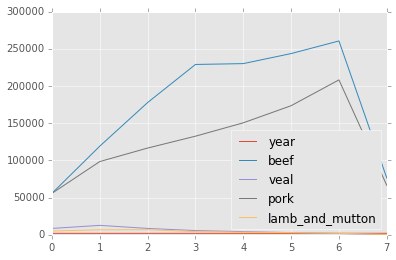

In [53]:

by_decade.plot()

In [54]:
plt.figure()

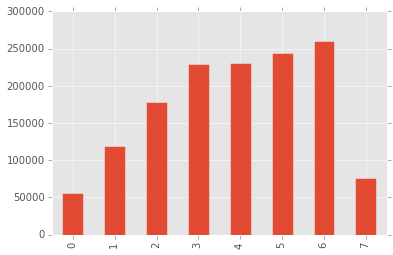

In [61]:
by_decade['beef'].plot(kind='bar')

In [65]:
by_decade_long = pd.melt(by_decade, id_vars="year")
by_decade_long.head(20)


,year,variable,value
0,1940,beef,55751.0
1,1950,beef,119161.0
2,1960,beef,177754.0
3,1970,beef,228947.0
4,1980,beef,230100.0
5,1990,beef,243579.0
6,2000,beef,260540.7
7,2010,beef,76391.5
8,1940,veal,8566.0
9,1950,veal,12693.0


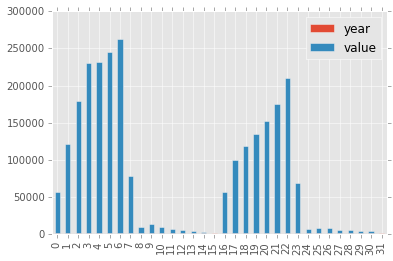

In [68]:
by_decade_long.plot(kind='bar',stacked=True)

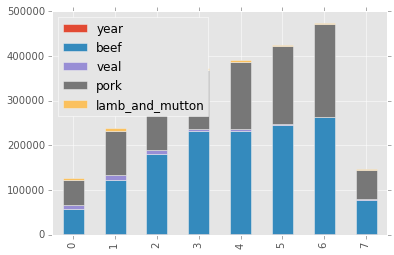

In [69]:
by_decade.plot(kind='bar',stacked=True)

In [74]:
from ggplot import meat
meat_lng = pd.melt(meat, id_vars=['date'])
meat_lng.head()
tt= ts.groupby(ts.index.year).sum()
tt.head()

,beef,veal,pork,lamb_and_mutton
1944,8801,1629,11502,1001
1945,9936,1552,8843,1030
1946,9010,1329,9220,946
1947,10096,1493,8811,779
1948,8766,1323,8486,728


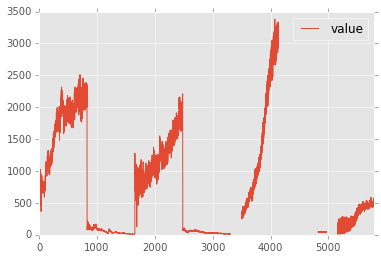

In [71]:
meat_lng.plot()